# EDA

I will now import clean dataset from data wrangling exercise. The goal for this exercise is exploratory data analysis. To begin EDA I will start with exploring existing features and will create few derived features which could come in handy for plotting time series data, for example, monthly data year over year. Another example could be duration of the campaign etc.


In [1]:
# Import required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
%matplotlib inline
sns.set()

In [2]:
# Import data from CSV file and save in dataframe df

df = pd.read_csv(r"C:\Users\Adi\Desktop\Data_Science\Capstone1\DataSet_clean.csv")

### Split dataset for EDA

As we know there are 5 different states i.e. failed, successful, live, canceled and suspended. I will create dataframe for successful and failed campaigns and proceed with EDA.

In [3]:
# Create two new working dataframes for successful and failed state
df['p_timesgoal'] = df['p_timesgoal'] * 100
df_failed = df[df['state'] == 'failed']
df_successful = df[df['state'] == 'successful']

### Monthly analysis

Group observations by month across all years and list total number of campaigns by state. This will allow me to plot number of failed and successful campaigns for all years. The goal is to identify if success is directly correlated to seasonality across all years.  

In [4]:
# Count monthly campaigns grouped by state

data = df.groupby(['month', 'state']).size().unstack('state')
data['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

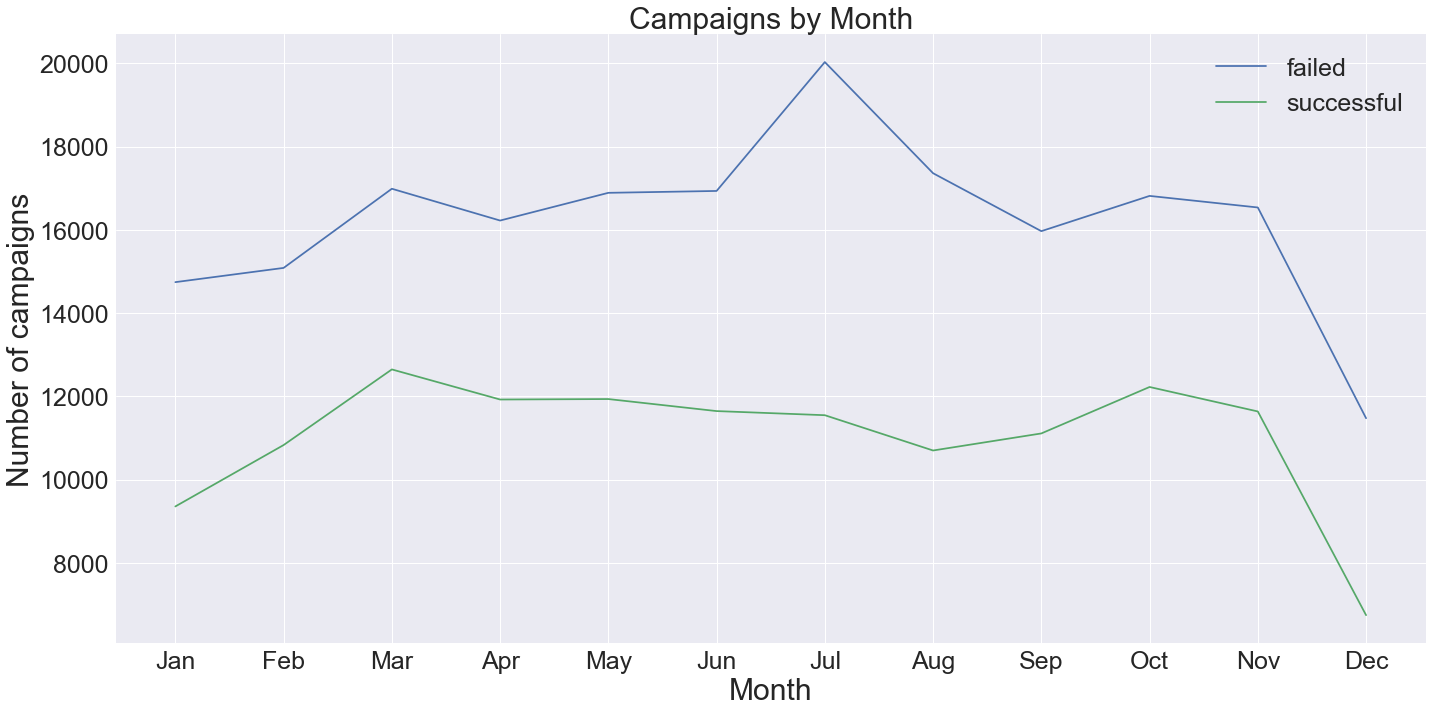

In [5]:
# Plot line chart for successful and failed campaigns
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(data['Month'], data['failed'])
ax.plot(data['Month'], data['successful'])
#ax.title('State grouped across months')
ax.legend(loc='upper right', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_title('Campaigns by Month', fontdict={'fontsize': 30})
ax.set_xlabel('Month', fontdict={'fontsize': 30})
ax.set_ylabel('Number of campaigns', fontdict={'fontsize': 30})
fig.tight_layout()

The above chart does not reveal much. This makes sense as I grouped data across all years. There is one minor observation, number of failed campaigns is highest in June and lowest in December.

Next logical step is to generate similar plot year over year. I am making a slight change to the metric, instead of using two values for successful and failed campaigns I will create success ratio 's_ratio'. This is equal to successful campaigns over sum of successful and failed campaigns.

NOTE: I am not considering canceled, suspended, and live campaigns in this ratio.

In [6]:
# Group data by year and month for successful and failed campaigns
s_yoy = df_successful.groupby(['month', 'year']).size().unstack('year')
f_yoy = df_failed.groupby(['month', 'year']).size().unstack('year')
# Group data by year and month for all campaigns, we might need this later. Just in case
yoy = df[(df.state == 'failed') | (df.state == 'successful')].groupby(['month', 'year']).size().unstack('year')
# Success ratio
s_ratio = s_yoy / (s_yoy + f_yoy)
s_ratio['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

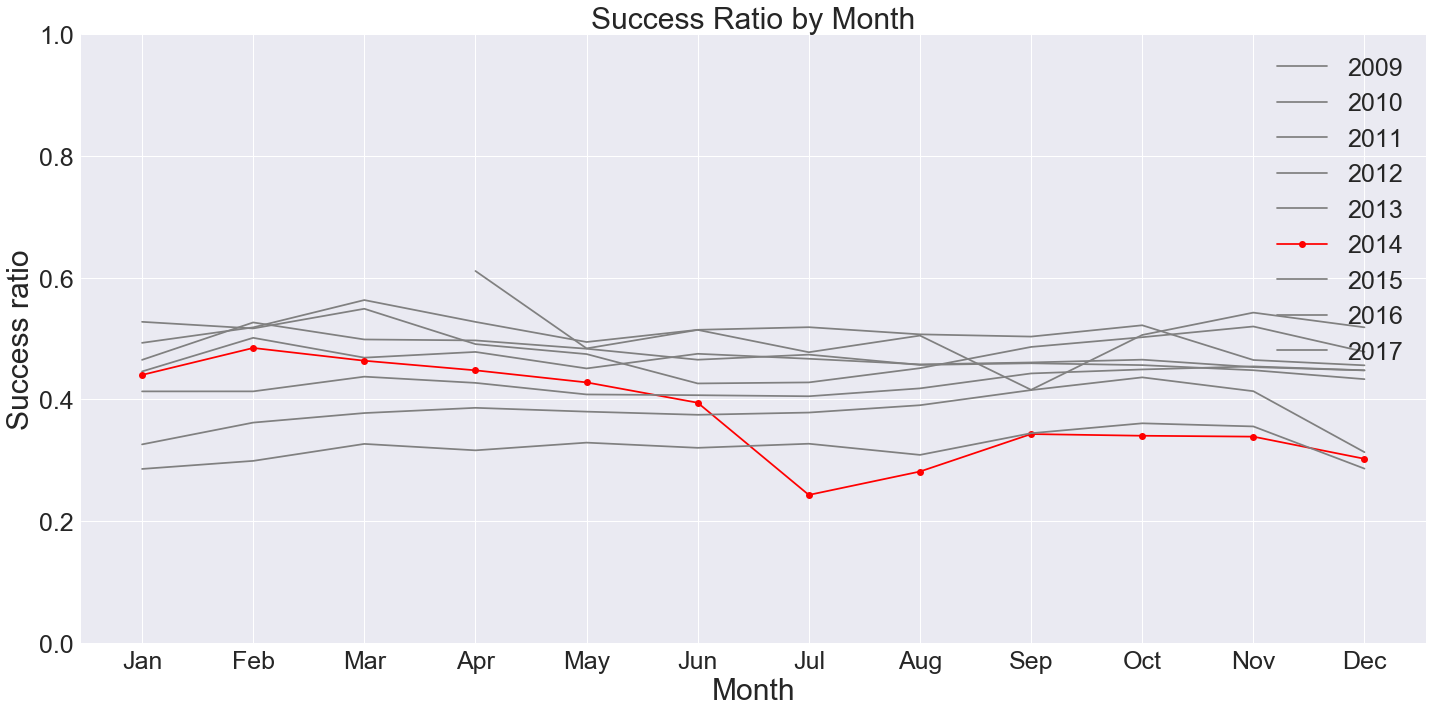

In [7]:
# Plot monthly s_ratio for all years 
fig, ax = plt.subplots(figsize=(20,10))
  
for i in range(9): 
    if i is 5:
        ax.plot(s_ratio['Month'], s_ratio[2009 + i], marker='o', color='r')
    else:
        ax.plot(s_ratio['Month'], s_ratio[2009 + i], 'grey')
ax.legend(loc='upper right', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_title('Success Ratio by Month', fontdict={'fontsize': 30})
ax.set_ylim(ymin=0, ymax=1)
ax.set_xlabel('Month', fontdict={'fontsize': 30})
ax.set_ylabel('Success ratio', fontdict={'fontsize': 30})
fig.tight_layout()

In [8]:
(s_ratio.loc[7, 2014] - s_ratio.loc[6, 2014])/s_ratio.loc[6, 2014]

-0.38405860267176506

As seen from the above plots, success ratio has declined in drastically in July for year 2014. This will need further analysis on why the success ratio went crashing in 2014 and then crawled back in subsequent years. Let's plot the total number of campaigns year over year.


#### Finding 1

As we can see from the below plots, there is a sudden increase in number of campaigns in July for year 2014. This is the same time frame where success ratio declined. This means a lot more campaigns were introduced starting July 2014 and majority of these failed initially. This will be my first finding.

In [9]:
yoy['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

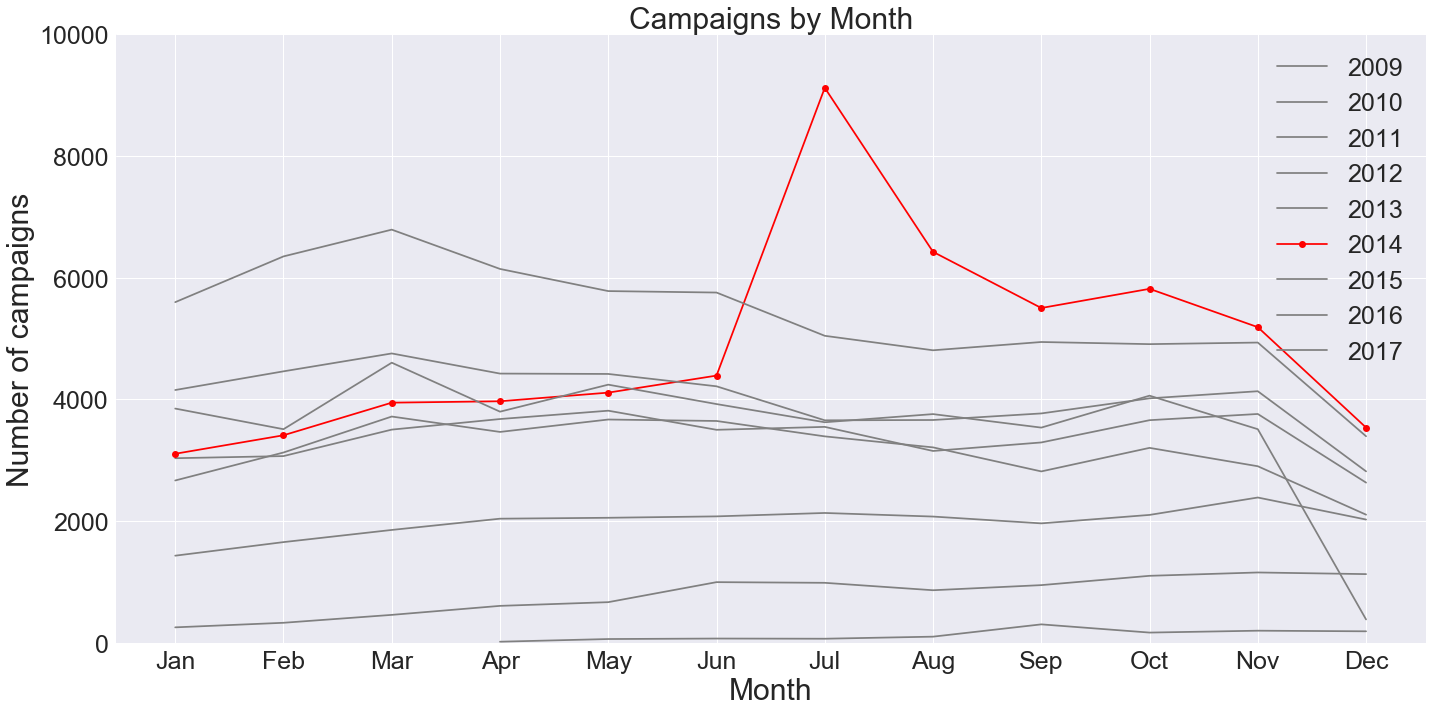

In [10]:
# Plot number of campaigns each month for all years

fig, ax = plt.subplots(figsize=(20,10))
for i in range(9): 
    if i is 5:
        ax.plot(yoy['Month'], yoy[2009 + i], marker='o', color='r')
    else:
        ax.plot(yoy['Month'], yoy[2009 + i], 'grey')
ax.legend(loc='upper right', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_title('Campaigns by Month', fontdict={'fontsize': 30})
ax.set_ylim(ymin=0, ymax=10000)
ax.set_xlabel('Month', fontdict={'fontsize': 30})
ax.set_ylabel('Number of campaigns', fontdict={'fontsize': 30})
fig.tight_layout()

### Region analysis

Let's take a look at total (successful + failed) campaigns year over year by regions.


In [11]:
countries = df[(df.state == 'failed') | (df.state == 'successful')].country.unique()
countries = countries.tolist()
length = len(countries)

In [12]:
data = df[(df.state == 'failed') | (df.state == 'successful')].groupby(['year', 'country']).size().unstack('country')
data.replace(np.nan, 0, inplace=True)
data_NA = data['US'] + data['CA'] + data['MX']
data_ANZ = data['AU'] + data['NZ']
data_EMEA = data['NO'] + data['IT'] + data['DE'] + data['IE'] + data['ES'] + data['SE'] + data['FR'] + data['CH'] + data['AT'] + data['BE'] + data['DK'] + data['HK'] + data['NL'] + data['LU'] + data['SG'] + data['JP']

Text(0,0.5,'Number of campaigns')

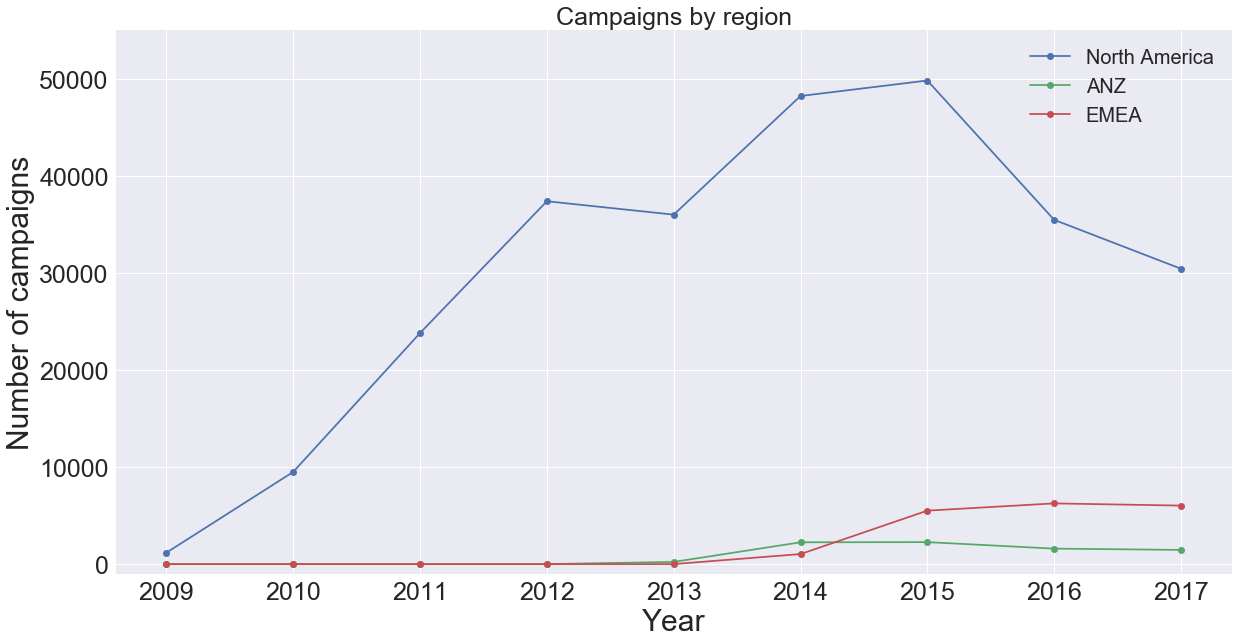

In [13]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(data_NA, marker='o')
ax1.plot(data_ANZ, marker='o')
ax1.plot(data_EMEA, marker='o')

ax1.legend(('North America', 'ANZ', 'EMEA'), loc='upper right', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)
ax1.set_title('Campaigns by region', fontdict={'fontsize': 25})
ax1.set_ylim(ymin=-1000, ymax=55000)
ax1.set_xlabel('Year', fontdict={'fontsize': 30})
ax1.set_ylabel('Number of campaigns', fontdict={'fontsize': 30})

#### Finding 2

NOTE: the above plots are on different scales. For North America the scale is maximum of 60,000. Whereas, for other regions it is much lower.

Plots above show most of the countries started running kickstarter campaigns in 2014 (confirmed from online sources like wikipedia).
This explains the increase in total campaigns. From finding 1 and 2 we can conclude the following:

- Success ratio declined by 38% from 0.39 to 0.24 in July 2014
- Total number of campaigns increased by whopping 107% in July 2014
- US has the most number of campaigns followed by GB
- 18 countries participated in 2015 as compared to 5 countries in 2013

Conclusion: more countries participated starting 2014 and produced poorer success ratio in initial years.

### Goal (amount requested) analysis

I want to understand how amount requested for campaigns aka goal is correlated with state (successful/failed). Let's check if there is any correlation between the two, i.e. goal and state. 


In [14]:
data = df[(df.state == 'successful') | (df.state == 'failed')]
data_NA = data[(data.country == 'US') | (data.country == 'CA') | (data.country == 'MX')]
data_ANZ = data[(data.country == 'AU') | (data.country == 'NZ')]
data_EMEA = data[(data.country == 'NO') | (data.country == 'IT') | (data.country == 'DE') | (data.country == 'IE') | (data.country == 'ES') | (data.country == 'SE') | (data.country == 'FR') | (data.country == 'CH') | (data.country == 'AT') | (data.country == 'BE') | (data.country == 'DK') | (data.country == 'HK') | (data.country == 'NL') | (data.country == 'LU') | (data.country == 'SG') | (data.country == 'JP')]

Text(0.5,0,'')

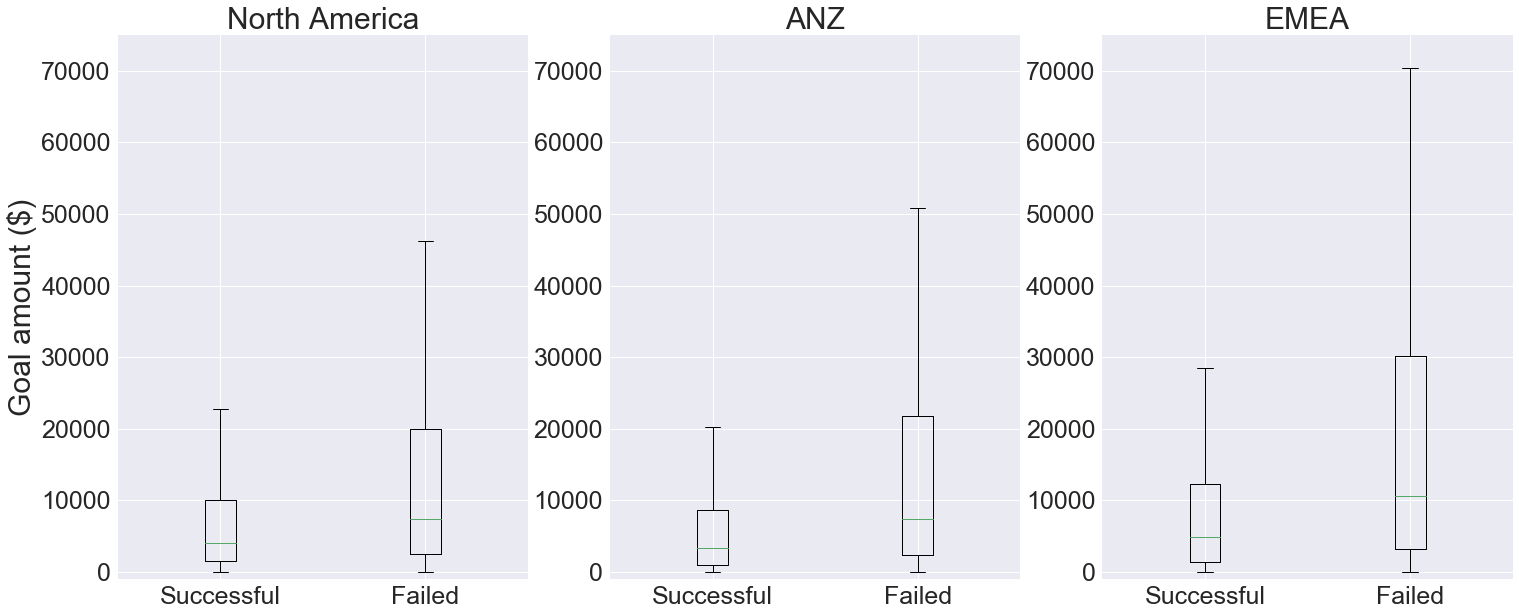

In [15]:
# Boxplot goal amount for successful and failed campaigns in each region

s_NA = data_NA[data_NA.state == 'successful']['usd_goal_real']
f_NA = data_NA[data_NA.state == 'failed']['usd_goal_real']
s_ANZ = data_ANZ[data_ANZ.state == 'successful']['usd_goal_real']
f_ANZ = data_ANZ[data_ANZ.state == 'failed']['usd_goal_real']
s_EMEA = data_EMEA[data_EMEA.state == 'successful']['usd_goal_real']
f_EMEA = data_EMEA[data_EMEA.state == 'failed']['usd_goal_real']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

ax1.boxplot([s_NA, f_NA])
ax2.boxplot([s_ANZ, f_ANZ])
ax3.boxplot([s_EMEA, f_EMEA])
ax1.set_xticklabels(['Successful', 'Failed'])
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)
ax1.set_title('North America', fontdict={'fontsize': 30})
ax1.set_ylim(ymin=-1000, ymax=75000)
ax1.set_xlabel('', fontdict={'fontsize': 30})
ax1.set_ylabel('Goal amount ($)', fontdict={'fontsize': 30})

ax2.set_xticklabels(['Successful', 'Failed'])
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='minor', labelsize=25)
ax2.set_title('ANZ', fontdict={'fontsize': 30})
ax2.set_ylim(ymin=-1000, ymax=75000)
ax2.set_xlabel('', fontdict={'fontsize': 30})
#ax2.set_ylabel('Goal amount', fontdict={'fontsize': 20})

ax3.set_xticklabels(['Successful', 'Failed'])
ax3.tick_params(axis='both', which='major', labelsize=25)
ax3.tick_params(axis='both', which='minor', labelsize=25)
ax3.set_title('EMEA', fontdict={'fontsize': 30})
ax3.set_ylim(ymin=-1000, ymax=75000)
ax3.set_xlabel('', fontdict={'fontsize': 30})
#ax3.set_ylabel('Goal amount', fontdict={'fontsize': 20})

#### Finding 3

Aha! there is strong correlation between goal and state for each region. This is also true for each main_category (analysis not shown).

However, this correlation does not signal causation. It will require further analysis and possibly a hypothesis test to prove the causation.

### Duration (length of campaign) analysis

Now let's run similar analysis for campaign duration to check if it is correlated with state (successful/failed). 
Also, same analysis for each main category produces similar findings (not shown).

(0, 60)

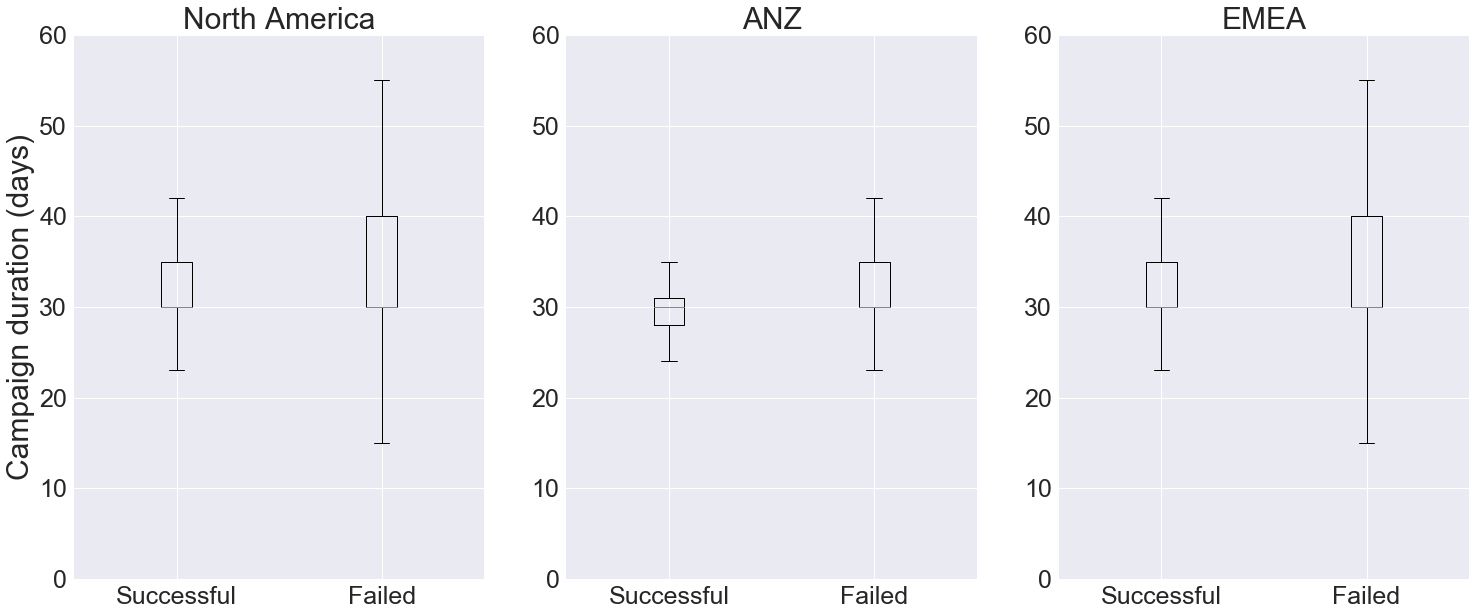

In [16]:
# Boxplot campaign duration for successful and failed campaigns in each region

s_NA = data_NA[data_NA.state == 'successful']['duration']
f_NA = data_NA[data_NA.state == 'failed']['duration']
s_ANZ = data_ANZ[data_ANZ.state == 'successful']['duration']
f_ANZ = data_ANZ[data_ANZ.state == 'failed']['duration']
s_EMEA = data_EMEA[data_EMEA.state == 'successful']['duration']
f_EMEA = data_EMEA[data_EMEA.state == 'failed']['duration']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

ax1.boxplot([s_NA, f_NA])
ax2.boxplot([s_ANZ, f_ANZ])
ax3.boxplot([s_EMEA, f_EMEA])

ax1.set_xticklabels(['Successful', 'Failed'])
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)
ax1.set_title('North America', fontdict={'fontsize': 30})
ax1.set_ylim(ymin=0, ymax=60)
#ax1.set_xlabel('Year', fontdict={'fontsize': 20})
ax1.set_ylabel('Campaign duration (days)', fontdict={'fontsize': 30})

ax2.set_xticklabels(['Successful', 'Failed'])
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='minor', labelsize=25)
ax2.set_title('ANZ', fontdict={'fontsize': 30})
ax2.set_ylim(ymin=0, ymax=60)
#ax2.set_xlabel('Year', fontdict={'fontsize': 20})
#ax2.set_ylabel('Number of campaigns', fontdict={'fontsize': 20})

ax3.set_xticklabels(['Successful', 'Failed'])
ax3.tick_params(axis='both', which='major', labelsize=25)
ax3.tick_params(axis='both', which='minor', labelsize=25)
ax3.set_title('EMEA', fontdict={'fontsize': 30})
ax3.set_ylim(ymin=0, ymax=60)
#ax3.set_xlabel('Year', fontdict={'fontsize': 20})
#ax3.set_ylabel('Number of campaigns', fontdict={'fontsize': 20})

#### Finding 4

Again! there is a strong correlation between campaign duration and state in all regions. This is also true for all main categories (analysis not shown).

Same principle applies here, correlation is not causation. Further analysis required.

### Perbacker analysis

We know pledged amount is the raised money. We also know backers is total number of people who supported the campaign by giving money. However, there is no data on what are different brackets for pledged amount, i.e. the mean value could be skewed.

Looking at the below CDF and histogram, it is evident that p_perbacker is right skewed. This may not be a good metric for analysis.

In [17]:
# Create array to store sorted value for successful campaigns
x1 = np.sort(df_successful['p_perbacker'])
y1 = np.arange(1, len(x1) + 1) / len(x1)
x1.mean()

91.16012456820638

Text(0,0.5,'Number of campaigns')

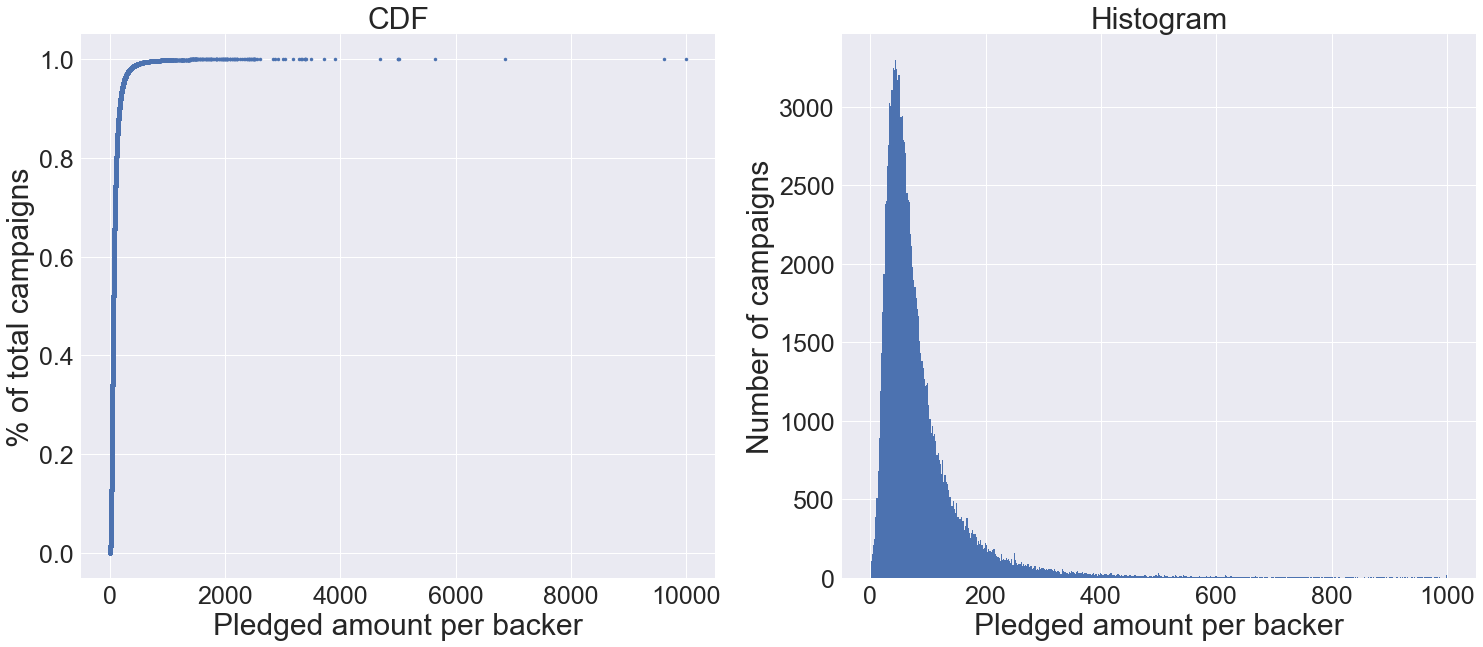

In [18]:
# Plot perbacker CDF for successful campaigns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))
ax1.plot(x1, y1, marker='.', linestyle='none')

ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)
ax1.set_title('CDF', fontdict={'fontsize': 30})

ax1.set_xlabel('Pledged amount per backer', fontdict={'fontsize': 30})
ax1.set_ylabel('% of total campaigns', fontdict={'fontsize': 30})

# Plot perbacker histogram for 500 bins and altered range as the data is right skewed

ax2.hist(df_successful.p_perbacker, bins=500, range=(df_successful.p_perbacker.min(), 1000))
ax2.set_xlabel('Pledged amount per backer')
ax2.set_ylabel('Number of campaigns')

ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='minor', labelsize=25)
ax2.set_title('Histogram', fontdict={'fontsize': 30})

ax2.set_xlabel('Pledged amount per backer', fontdict={'fontsize': 30})
ax2.set_ylabel('Number of campaigns', fontdict={'fontsize': 30})

### Pledged vs Goal

One of the derived features in dataset is pledged amount as a percentage of goal amount. For successful campaign it should be at least 100%, more than 100% is a stretch goal which is happy scenario.

In [19]:
df_successful = df[df.state == 'successful']
df_failed = df[df.state == 'failed']

In [20]:
data = df[(df.state == 'successful') | (df.state == 'failed')]
data_NA = data[(data.country == 'US') | (data.country == 'CA') | (data.country == 'MX')]
data_ANZ = data[(data.country == 'AU') | (data.country == 'NZ')]
data_EMEA = data[(data.country == 'NO') | (data.country == 'IT') | (data.country == 'DE') | (data.country == 'IE') | (data.country == 'ES') | (data.country == 'SE') | (data.country == 'FR') | (data.country == 'CH') | (data.country == 'AT') | (data.country == 'BE') | (data.country == 'DK') | (data.country == 'HK') | (data.country == 'NL') | (data.country == 'LU') | (data.country == 'SG') | (data.country == 'JP')]

s_NA = data_NA[data_NA.state == 'successful']['p_timesgoal']
f_NA = data_NA[data_NA.state == 'failed']['p_timesgoal']
s_ANZ = data_ANZ[data_ANZ.state == 'successful']['p_timesgoal']
f_ANZ = data_ANZ[data_ANZ.state == 'failed']['p_timesgoal']
s_EMEA = data_EMEA[data_EMEA.state == 'successful']['p_timesgoal']
f_EMEA = data_EMEA[data_EMEA.state == 'failed']['p_timesgoal']

(-10, 400)

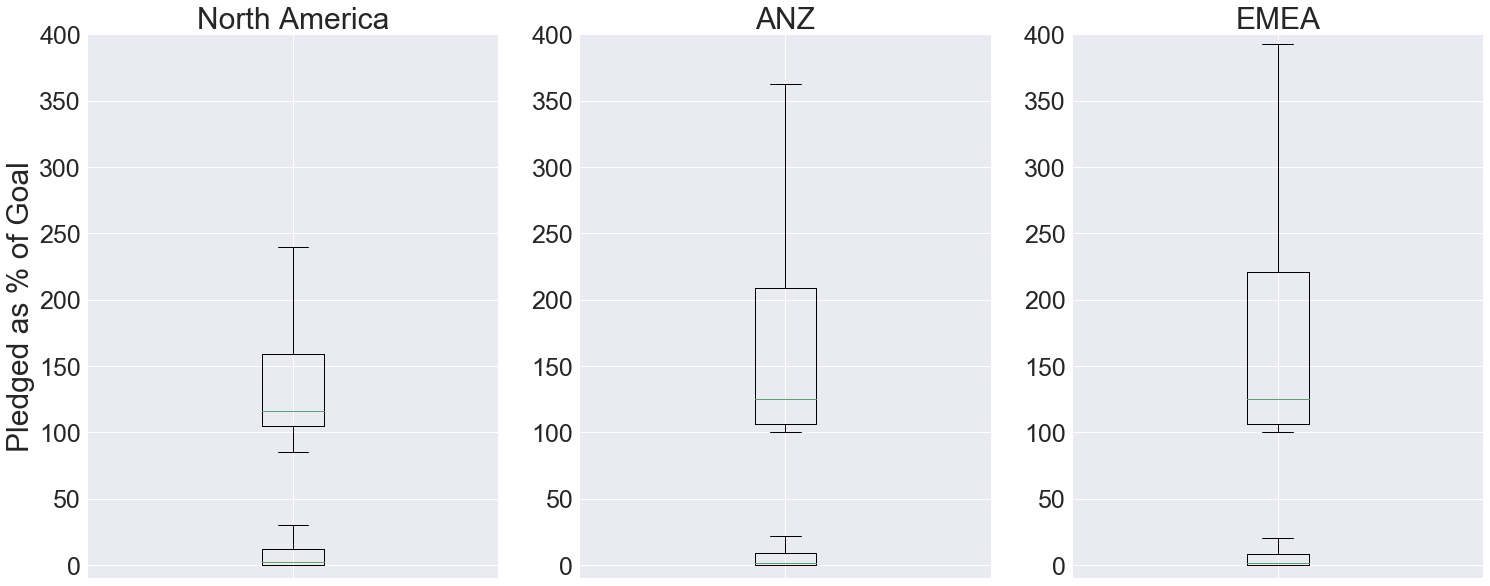

In [21]:
# Boxplot pleged amount as % of goal amount for successful and failed campaigns in each region

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

ax1.boxplot(s_NA)
ax1.boxplot(f_NA)
ax2.boxplot(s_ANZ)
ax2.boxplot(f_ANZ)
ax3.boxplot(s_EMEA)
ax3.boxplot(f_EMEA)

ax1.set_xticklabels('')
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)
ax1.set_title('North America', fontdict={'fontsize': 30})
ax1.set_ylim(ymin=-10, ymax=400)
#ax1.set_xlabel('Year', fontdict={'fontsize': 20})
ax1.set_ylabel('Pledged as % of Goal', fontdict={'fontsize': 30})

ax2.set_xticklabels('')
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='minor', labelsize=25)
ax2.set_title('ANZ', fontdict={'fontsize': 30})
ax2.set_ylim(ymin=-10, ymax=400)
#ax2.set_xlabel('Year', fontdict={'fontsize': 20})
#ax2.set_ylabel('Number of campaigns', fontdict={'fontsize': 20})

ax3.set_xticklabels('')
ax3.tick_params(axis='both', which='major', labelsize=25)
ax3.tick_params(axis='both', which='minor', labelsize=25)
ax3.set_title('EMEA', fontdict={'fontsize': 30})
ax3.set_ylim(ymin=-10, ymax=400)
#ax3.set_xlabel('Year', fontdict={'fontsize': 20})
#ax3.set_ylabel('Number of campaigns', fontdict={'fontsize': 20})

Above plot shows that pledged (or raised) amount for failed campaigns is far from reaching anywhere close to 100% of the goal amount. This is consistent across all regions. There is a possible hypothesis, find probability of success if reached x% of goal.

In [22]:
# Create array to store sorted value for campaigns

x1 = np.sort(df[(df.state == 'failed')].p_timesgoal)
y1 = np.arange(1, len(x1) + 1) / len(x1)
y1 = y1 * 100

Text(0,0.5,'% Campaigns')

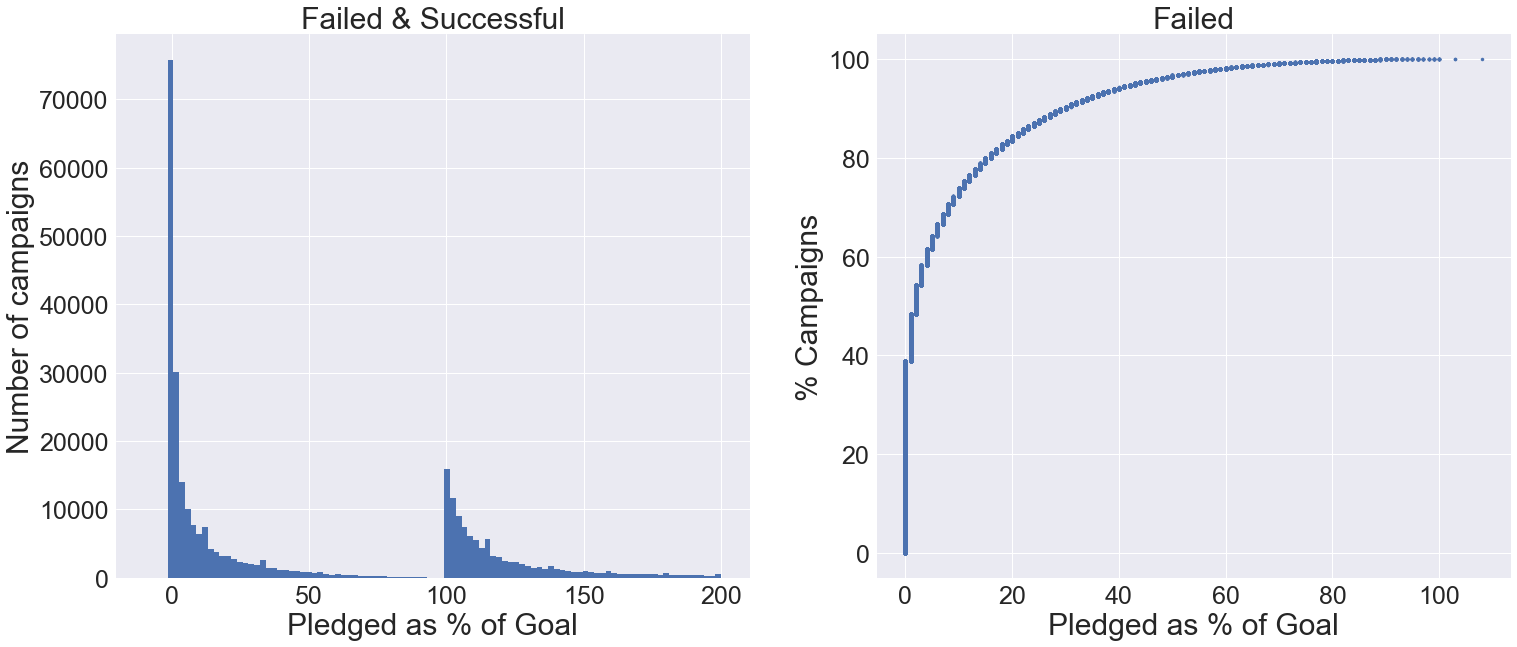

In [23]:
# Plot p_timesgoal histogram

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

ax1.hist(df[(df.state == 'successful') | (df.state == 'failed')].p_timesgoal, bins=100, range=(-10, 200))
ax2.plot(x1, y1, marker='.', linestyle='none')

#ax1.set_xticklabels('')
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)
ax1.set_title('Failed & Successful', fontdict={'fontsize': 30})
#ax1.set_ylim(ymin=-10, ymax=300)
ax1.set_xlabel('Pledged as % of Goal', fontdict={'fontsize': 30})
ax1.set_ylabel('Number of campaigns', fontdict={'fontsize': 30})

#ax1.set_xticklabels('')
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='minor', labelsize=25)
ax2.set_title('Failed', fontdict={'fontsize': 30})
#ax1.set_ylim(ymin=-10, ymax=300)
ax2.set_xlabel('Pledged as % of Goal', fontdict={'fontsize': 30})
ax2.set_ylabel('% Campaigns', fontdict={'fontsize': 30})

In [24]:
df_failed['p_timesgoal'].quantile(0.90)

30.0

#### Finding 5

It is evident from above plots that a lot more failed campaigns are not able to pledge substantial amount. This can be better understood with the fact, 90% of failed campaigns have raised less than 30% of their desired goal amount. 

In [25]:
df.to_csv('DataSet_EDA.csv', index=False)

## Summary

#### Finding 1 - July 2014, success ration dropped by 38% 
Success ratio is the number of successful campaigns over total campaigns (successful + failed)
#### Finding 2 - 2014, increased international participation
#### Finding 3 - Successful campaigns record lower mean goal across all regions and main categories
#### Finding 4 - Successful campaigns record lower mean duration across all regions and main categories
#### Finding 5 - 90% of failed campaigns pledge less than 30% of initial goal.

### Hypothesis - TBD


